In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn 

In [2]:
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv(r"D:\Downloads\sonar_dataset.csv",header=None)
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
190,0.0156,0.0210,0.0282,0.0596,0.0462,0.0779,0.1365,0.0780,0.1038,0.1567,...,0.0150,0.0060,0.0082,0.0091,0.0038,0.0056,0.0056,0.0048,0.0024,M
173,0.0329,0.0216,0.0386,0.0627,0.1158,0.1482,0.2054,0.1605,0.2532,0.2672,...,0.0095,0.0151,0.0059,0.0015,0.0053,0.0016,0.0042,0.0053,0.0074,M
183,0.0096,0.0404,0.0682,0.0688,0.0887,0.0932,0.0955,0.2140,0.2546,0.2952,...,0.0237,0.0078,0.0144,0.0170,0.0012,0.0109,0.0036,0.0043,0.0018,M
14,0.0124,0.0433,0.0604,0.0449,0.0597,0.0355,0.0531,0.0343,0.1052,0.2120,...,0.0083,0.0057,0.0174,0.0188,0.0054,0.0114,0.0196,0.0147,0.0062,R
50,0.0353,0.0713,0.0326,0.0272,0.0370,0.0792,0.1083,0.0687,0.0298,0.0880,...,0.0163,0.0242,0.0043,0.0202,0.0108,0.0037,0.0096,0.0093,0.0053,R


In [3]:
df.shape

(208, 61)

In [4]:
x=df.drop(60,axis='columns')
y=df[60]


In [5]:
y=pd.get_dummies(y,drop_first=True)
y.sample(5)

,R
177,0
166,0
182,0
24,1
76,1


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [7]:
X_train.shape,X_test.shape

((156, 60), (52, 60))

In [8]:
import tensorflow as tf
from tensorflow import keras


In [13]:
model=keras.Sequential([keras.layers.Dense(60,input_dim=60,activation='relu'),keras.layers.Dropout(0.5),keras.layers.Dense(30,activation='relu'),keras.layers.Dropout(0.5),keras.layers.Dense(15,activation='relu'),keras.layers.Dropout(0.5),keras.layers.Dense(1,activation='sigmoid')])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100,batch_size=8)

Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.7287 - accuracy: 0.5962
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.7002 - accuracy: 0.5705
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.7413 - accuracy: 0.4872
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5192
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4744
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6564 - accuracy: 0.5769
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6518 - accuracy: 0.6154
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6815 - accuracy: 0.5641
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6629 - accuracy: 0.5833
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6774 - accuracy: 0.6026
Epoch 11/

In [14]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 11ms/step - loss: 0.3635 - accuracy: 0.8269


[0.36345767974853516, 0.8269230723381042]

In [15]:
yp=model.predict(X_test)
yp

2/2 [==============================] - 0s 11ms/step


array([[1.11251786e-04],
       [8.81439865e-01],
       [9.39455152e-01],
       [1.49294250e-02],
       [9.99555111e-01],
       [9.44851518e-01],
       [3.64779174e-01],
       [9.99712527e-01],
       [2.72167623e-02],
       [9.99862373e-01],
       [7.54324794e-01],
       [4.69966859e-01],
       [1.61449909e-01],
       [5.37537858e-02],
       [2.33983934e-01],
       [1.96448117e-01],
       [9.85308230e-01],
       [2.07753927e-02],
       [6.85668886e-01],
       [9.99100924e-01],
       [2.46929079e-02],
       [9.99015927e-01],
       [4.73129243e-01],
       [8.94066691e-01],
       [1.45495817e-01],
       [3.13281897e-03],
       [2.13315129e-01],
       [9.78700519e-02],
       [9.97571290e-01],
       [6.11722320e-02],
       [6.05246186e-01],
       [3.78744700e-03],
       [2.52712160e-01],
       [8.97697031e-01],
       [8.61069500e-01],
       [9.04271603e-01],
       [9.98469830e-01],
       [9.87543404e-01],
       [9.91813838e-01],
       [1.56713128e-01],


In [16]:
y_pred=[]
for i in yp:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred[:10]

[0, 1, 1, 0, 1, 1, 0, 1, 0, 1]

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        27
           1       0.86      0.76      0.81        25

    accuracy                           0.83        52
   macro avg       0.83      0.82      0.83        52
weighted avg       0.83      0.83      0.83        52



Text(95.72222222222221, 0.5, 'Truth')

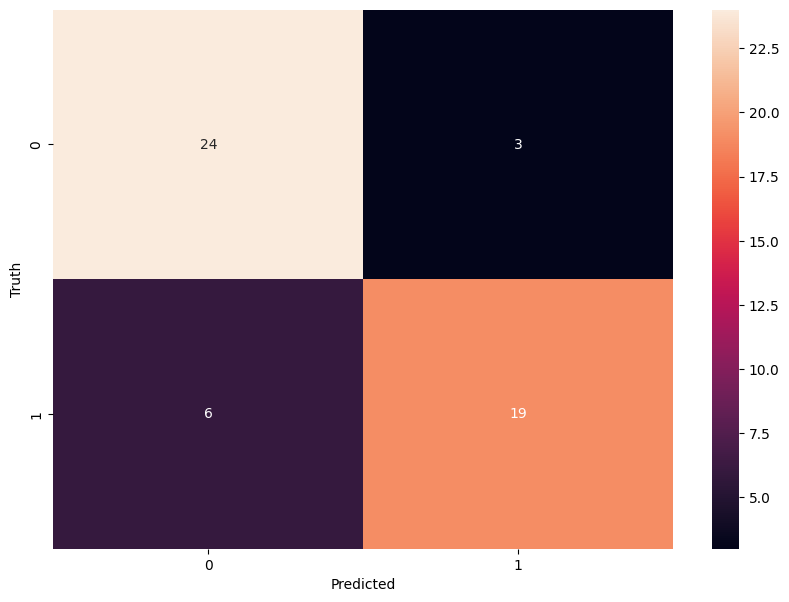

In [18]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')